*Датасет, выбранный для анализа - это полная информация о клиентах международного банка ABC. На основе анализа датасета мы можем сравнить клиентов банка, посмотреть соцдем характеристики, проанализировать основных клиентов, которые покинули банк и спрогнозировать, что будет в будущем.*

**Датасет содержит следующую информацию:**

1. customer_id - id клиента
2. credit_score - кредитоспособность (осценка способности клиента погосить кредит от 300 до 850)
3. country - страна проживания клиента
4. gender - пол клиента
5. age - возраст клиента
6. tenure - срок сотрудничества клиента с банком
7. balance - размер вклада клиента
8. products_number - количество продуктов (услуг), которые клиент использует в банке
9. credit_card - наличие кредитной карты (1 - если карта есть, 0 - если нет)
10. active_member - активность клиента (1 - если клиент активно взаимодействовует/ал с банком, 0 - если нет)
11. estimated_salary - размер зарабтоной платы клиента
12. churn - отток (прекращение сотрудничества клиента с банком, 1 - если клиент покинул банк, 0 - если нет)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
bank = pd.read_csv("Bank Customer Churn Prediction.csv")
bank.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Для начала подробнее посмотрим на датасет.

In [2]:
bank.info() #в датасете 12 коллонок и 10000 строк, пропусков нет, узнали типы данных (object - строка, int64 - целое число, float64 - вещественные числа)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [3]:
bank.tail() #посмотрим на конец датасета

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:
bank.shape #размер датасета

(10000, 12)

In [5]:
bank.nunique() #количество уникальных значений

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [6]:
bank.drop('customer_id',axis = 1,inplace = True) #В датасете нет пропущенных данных. Однако мы можем избавиться от одного из столбцов, потому что он не несет в себе важного смысла для анализа (customer_id).

In [7]:
bank.columns #далее переименуем колоники, чтобы было удобнее дальше анализировать 

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [8]:
bank.rename(columns = {'credit_score':'кредитоспособность', 'country':'страна клиента', 'gender':'пол',
                            'age':'возраст', 'tenure':'срок сотрудничества', 'balance':'баланс', 
                            'products_number':'количесвто продуктов из банка','credit_card':'наличие кредитной карты', 
                            'active_member':'активность клиента в банке', 'estimated_salary':'доход клиента', 
                            'churn':'отток'}, inplace = True)

In [9]:
bank[:2] #выведем первые строки, чтобы посмотреть, что получилось

,кредитоспособность,страна клиента,пол,возраст,срок сотрудничества,баланс,количесвто продуктов из банка,наличие кредитной карты,активность клиента в банке,доход клиента,отток
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [10]:
bank.describe() #теперь посмотрим на базовые статистики, которые пригодятся нам для дальнейшего анализа

,кредитоспособность,возраст,срок сотрудничества,баланс,количесвто продуктов из банка,наличие кредитной карты,активность клиента в банке,доход клиента,отток
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
bank.describe(include=[np.object]) 

C:\Users\kolya\AppData\Local\Temp\ipykernel_31328\2341184594.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bank.describe(include=[np.object])


,страна клиента,пол
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


Мы видим, что у нас всего три страны, больше всего клиентов из Франции, также в датасете больше мужчин, чем женщин.

Датасет содержит информацию о 10000 клиентах банка,далее более подробно посмотрим на наших клиентов.

In [12]:
import seaborn as sns

<AxesSubplot:xlabel='возраст', ylabel='Count'>

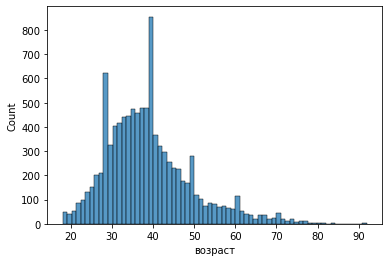

In [13]:
sns.histplot(bank['возраст']) #датасет представлен людьми разных возрастов, средний возраст прмиерно 37 лет

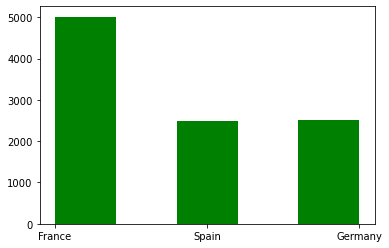

In [14]:
plt.hist(x = bank['страна клиента'], bins = 5, color = 'green') 
#Большенство клиентов из Франции, количество клиентов из Испании и германии примерно на одном уровне
plt.show()

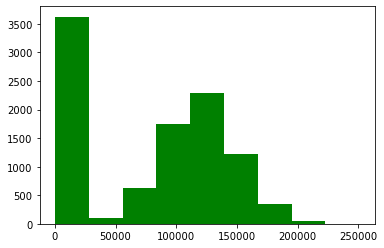

In [15]:
plt.hist(x = bank['баланс'], bins = 9, color = 'green')
plt.show() 
#Размер баланса также различается, интересно, что есть клиенты с 0 счетом

In [16]:
bank['баланс'].min()

0.0

In [17]:
bank['баланс'].max()

250898.09

<AxesSubplot:xlabel='доход клиента', ylabel='Count'>

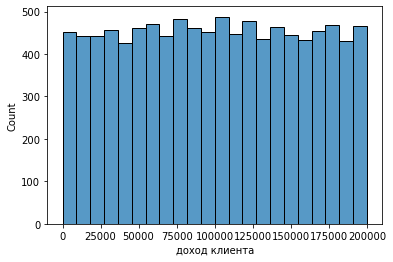

In [18]:
sns.histplot(bank['доход клиента']) #посмотрим доход клиента с помощью гистограммы 

In [19]:
bank['доход клиента'].min()

11.58

In [20]:
bank['доход клиента'].max()

199992.48

Доход клиентов тоже очень разный. Он варьируется от примерно 12 до 200000

In [21]:
bank.groupby('страна клиента')['баланс'].mean() #в Германии средний размер баланса выше по сравнению с другими странами

страна клиента
France      62092.636516
Germany    119730.116134
Spain       61818.147763
Name: баланс, dtype: float64

In [22]:
bank.groupby('пол')['наличие кредитной карты'].count() #чаще всего мужчины берут кредитные карты

пол
Female    4543
Male      5457
Name: наличие кредитной карты, dtype: int64

In [23]:
bank['кредитоспособность'].mode() #чаще всего клиенты имеет наивысшую оценку кредитоспособности

0    850
Name: кредитоспособность, dtype: int64

In [24]:
bank['срок сотрудничества'].value_counts() #большенство клиентов сотрудничают с банком два года

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: срок сотрудничества, dtype: int64

Мы посмотрели на первичный анализ клиентов. Можно сразу сказать, что список клиентов очень разнообразный, есть люди разных возрастов и с разным доходом и размером счета.

Один из ключевых показателей дтасета - это отток клиентов. Далее мы посмотрим на факторы, которые вероятнее всего повлияли на клиентов, которые решили прекратить сотрудничество с банком. В своем анализе датасета я решила сфокусироваться на оттоке клиентов банка и посмотреть, какие факторы могут на это влиять. Почему клиенты могут отказаться от услуг банка? Это может быть связано с возрастом, с наличием кредитной карты, балансом клиента и пр.

In [25]:
bank.corr() #проверим корреляцию данных 

,кредитоспособность,возраст,срок сотрудничества,баланс,количесвто продуктов из банка,наличие кредитной карты,активность клиента в банке,доход клиента,отток
кредитоспособность,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
возраст,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
срок сотрудничества,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
баланс,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
количесвто продуктов из банка,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
наличие кредитной карты,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
активность клиента в банке,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
доход клиента,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
отток,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [26]:
cols_num = ['кредитоспособность', 'возраст', 'срок сотрудничества', 'баланс', 'количесвто продуктов из банка', 
            'наличие кредитной карты', 'активность клиента в банке', 'отток']

In [27]:
correlation = bank.corr().loc[cols_num, cols_num]

<AxesSubplot:>

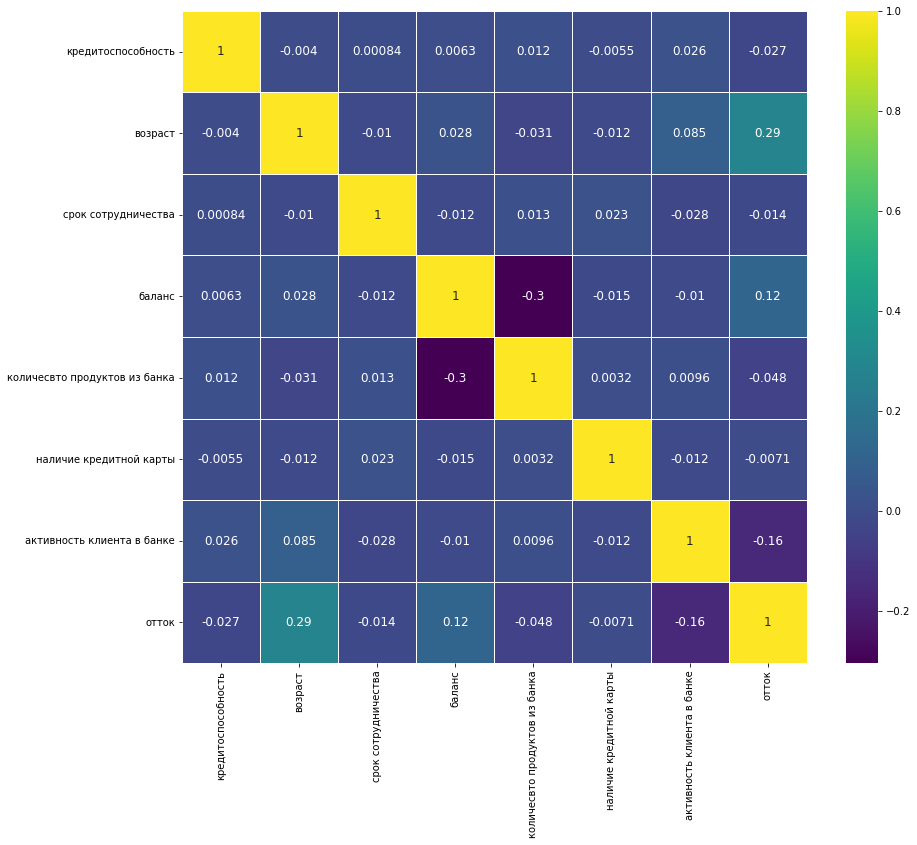

In [28]:
fig , ax = plt.subplots(figsize = (14,12))

sns.heatmap(correlation, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12}) #тепловая карта для наглядности

Таким образом мы можем оценить взаимосвязь данных и выдвинуть гипотезы, что могли повлиять на отток клиентов.

В данном случае нас интересует переменная "отток", мы видим, что слабая корреяционная связь с кредитоспособностью, сроком сотрудничества с банком, наличием кредитной карты. Можно проследить взаимосвязь оттока с балансом и возрастом.  

In [29]:
bank['отток'].value_counts() #всего банк покинули 2037 клиентов и 10000

0    7963
1    2037
Name: отток, dtype: int64

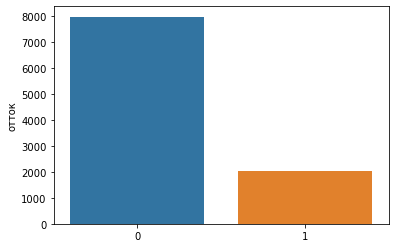

In [30]:
sns.barplot(x=bank['отток'].value_counts().index, y=bank['отток'].value_counts())
plt.show() #соотношение ушедших клиентов банка к оставшимся с столбчатой диаграмме 

In [31]:
churn_percentage = 2037 * 100 / 10000 #определили процент оттока, который составил примерно 20%
churn_percentage

20.37

Итак, с чем же может быть связан отток клиента? Например, кажется, что чем активнее клиент банка, тем меньше вероятность, что он покинет банк. Так ли это?

<AxesSubplot:xlabel='активность клиента в банке'>

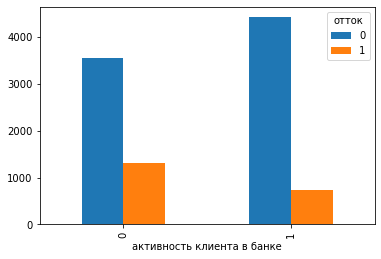

In [32]:
bank.groupby('активность клиента в банке')['отток'].value_counts().unstack().plot(kind='bar')

На графике видно, что неактивные клиенты покидают компанию чаще (практически в полтора раза), чем клиенты, которые активно взаимодействуют с банком. то делает клиента активным? Его взаимодействие с мобильным приложением банка, готовность клиента коммуницировать с сотрудниками банка, лушать о новых преимуществах и возможностях. Мы видим, что клиенты, которым не интересны такие взаиодействия - уходят. Возможно банку стоит усовершенствовать приложение или как-то напомнить о себе уже для текущих клиентов.

Одна из моих гипотиз - это то, что клиенты реже уходят из банка, если у них есть кредитная карта. Проверим, так ли это

<AxesSubplot:xlabel='наличие кредитной карты'>

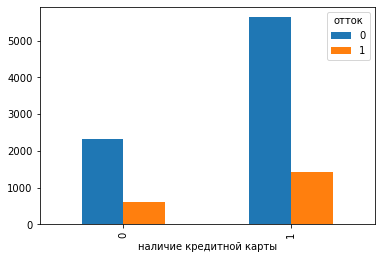

In [33]:
bank.groupby('наличие кредитной карты')['отток'].value_counts().unstack().plot(kind='bar')

<AxesSubplot:xlabel='наличие кредитной карты', ylabel='Count'>

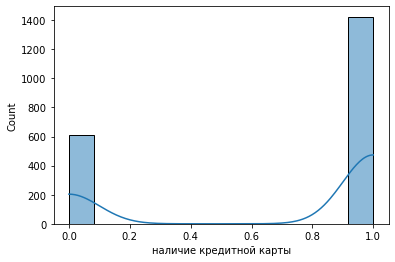

In [34]:
sns.histplot(bank[bank['отток']== 1]['наличие кредитной карты'], kde=True)

Интересно, что клиенты, имеющие кредитную карту тоже уходят. Навеное, другие банки предлагают более выгодные условия. Однако нельзя сказать, что это слишком большой процент. 

Грубо говоря, наших клиентов можно разделить на тех, кто покинул банк и на тех, кто продолжает пользоваться его услугами. Мы можем подробнее изучить тех, кто решил оставить банк.

In [35]:
left_bank = bank[bank['отток'] == 1]
left_bank.describe() #left_bank - выделим людей, которые ушли из банка

,кредитоспособность,возраст,срок сотрудничества,баланс,количесвто продуктов из банка,наличие кредитной карты,активность клиента в банке,доход клиента,отток
count,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0
std,100.321503,9.761562,2.936106,58360.794816,0.801521,0.458776,0.480358,57912.418071,0.0
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,578.000000,38.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,646.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,716.000000,51.000000,8.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000,1.0
max,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


In [36]:
stayed_at_bank = bank[bank['отток'] == 0]
stayed_at_bank.describe() #stayed_at_bank - текущие клиенты банка

,кредитоспособность,возраст,срок сотрудничества,баланс,количесвто продуктов из банка,наличие кредитной карты,активность клиента в банке,доход клиента,отток
count,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.0
mean,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.0
std,95.653837,10.125363,2.880658,62848.040701,0.509536,0.455101,0.497045,57405.586966,0.0
min,405.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.0
25%,585.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50783.490000,0.0
50%,653.000000,36.000000,5.000000,92072.680000,2.000000,1.000000,1.000000,99645.040000,0.0
75%,718.000000,41.000000,7.000000,126410.280000,2.000000,1.000000,1.000000,148609.955000,0.0
max,850.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,1.000000,199992.480000,0.0


Мы разделили клиентов на тех, кто остался в банке (stayed_at_bank) и покинул его (left_bank). Теперь мы можем подробнее узнать о факторах, которые могла повляить на те или иные группы клиентов. Например, посмотрим на их возраст.

In [37]:
left_bank['возраст'].mean() #средний возраст ушедших клиентов

44.8379970544919

<AxesSubplot:>

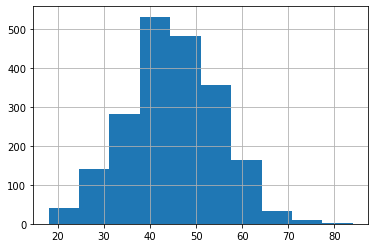

In [38]:
left_bank['возраст'].hist()

In [39]:
stayed_at_bank['возраст'].mean() #средний возраст оставшихся клиентов

37.40838879819164

<AxesSubplot:>

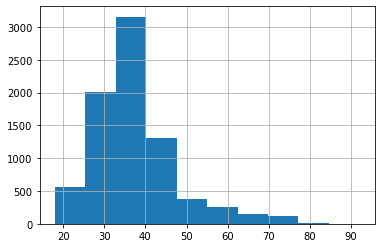

In [40]:
stayed_at_bank['возраст'].hist()

Таким образом, мы сравнили возраст клиентов. Мы видим, что чаще всего банк покидают люди старше 40 лет. Это интересно, обычно, чем человек становится страше, тем ему больше хочется стабильности в жизни, особенно, если это связано с финансовыми вопросами. Это может быть связано с тем, что банк больше сфокусирован на молодой аудитории и не разрабатывает никаких кастомизированных предложений для людей старше.

<AxesSubplot:xlabel='возраст', ylabel='Count'>

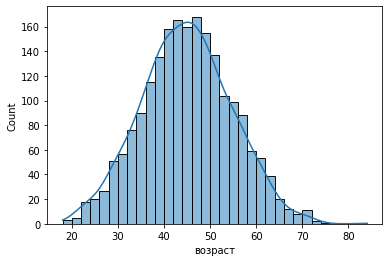

In [41]:
sns.histplot(bank[bank['отток']== 1]['возраст'], kde=True) #соотношение ушедших клиентов и их возраста

Кредитоспособность выражается в оценнке возможности клиента погасить кредит, она варьируется от 300-850. С помощью стандартизированной оценки мы можем оценить меру разброса скоринга для оставшихся и ушедших клиентов.

In [42]:
import scipy.stats

In [43]:
left_bank['z-score'] = scipy.stats.zscore(left_bank['кредитоспособность'])

C:\Users\kolya\AppData\Local\Temp\ipykernel_31328\2278909516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_bank['z-score'] = scipy.stats.zscore(left_bank['кредитоспособность'])


In [44]:
left_bank.head()

,кредитоспособность,страна клиента,пол,возраст,срок сотрудничества,баланс,количесвто продуктов из банка,наличие кредитной карты,активность клиента в банке,доход клиента,отток,z-score
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,-0.262735
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,-1.429272
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,-0.003505
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,-2.685542
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,0.076259


In [45]:
stayed_at_bank['z-score'] = scipy.stats.zscore(stayed_at_bank['кредитоспособность'])

C:\Users\kolya\AppData\Local\Temp\ipykernel_31328\1058107793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stayed_at_bank['z-score'] = scipy.stats.zscore(stayed_at_bank['кредитоспособность'])


In [46]:
stayed_at_bank.head()

,кредитоспособность,страна клиента,пол,возраст,срок сотрудничества,баланс,количесвто продуктов из банка,наличие кредитной карты,активность клиента в банке,доход клиента,отток,z-score
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,-0.458486
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.492921
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2.071629
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0,1.778888
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,-1.577173


In [47]:
bank = pd.concat([left_bank, stayed_at_bank])

<AxesSubplot:>

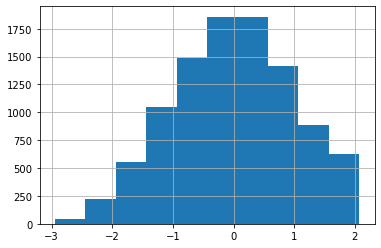

In [48]:
bank['z-score'].hist()

In [49]:
bank.groupby('отток')['z-score'].mean()

отток
0    1.694265e-16
1    1.556601e-16
Name: z-score, dtype: float64

Можно сказать, что распределние оценок кредитоспособности относительно оттока клиентов находится практически на одном уровне.

У банка клиент может использовать до 4 продктов. Можно предположить, что клиенты, которые используют больше продуктов - более лояльны к банку и скорее всего его не покинут. 

In [50]:
bank[(bank['отток'] == 1)]['количесвто продуктов из банка'].value_counts()

1    1409
2     348
3     220
4      60
Name: количесвто продуктов из банка, dtype: int64

In [51]:
bank[(bank['отток'] == 0)]['количесвто продуктов из банка'].value_counts()

2    4242
1    3675
3      46
Name: количесвто продуктов из банка, dtype: int64

Большая часть клиентов банка использует 1-2 продукта, однако можно заметить, что клиенты, которые используют 3-4 продукта чаще уходят. Например, было всего 60 клиентов, которые использовали 4 продукта и все они ушли.

<AxesSubplot:xlabel='отток'>

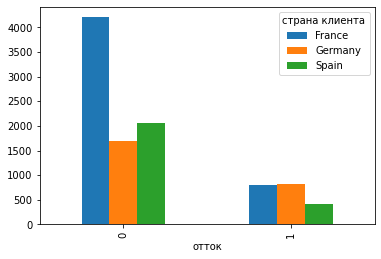

In [52]:
bank.groupby('отток')['страна клиента'].value_counts().unstack().plot(kind='bar')

Также сравним место проживания клиентов с уровнем оттока. В Германии и Испании было примерно одинаковое количество клиентов за все время, однако испанцы реже всех покидают банк. Судя по графику чаще всего услги банка не устраивают немцев (соотношение текущих французских клиентов к ушедшим гораздо меньше ощущается). 

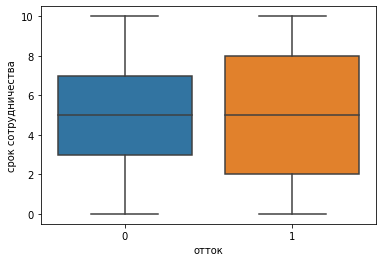

In [53]:
sns.boxplot(x=bank['отток'], y=bank['срок сотрудничества']) #блочная диаграмма
plt.show()

Если мы посмотрим на диаграмму, то можно сказать, что срок сотрудничества и отток клиентов не сильно взаимосвязаны, нет выбросов данных. Банк покидают клиенты, которые были с ним и 2 года, и 7 лет.

Конечно же нельзя говорить о банке, не измерив финансовую составляющую. Ниже гафики, которые показывают взаимосвязь заработной платы и уровня сбережений с теми, кто покинул банк и с теми, кто остался. Интересно, что заработная плата клиентов никак не вияет на уровень оттока. А вот в размере баланса можно увидеть разницу. Так, размер средств, ушедших клиентов в основном находится в передлах 50000-130000, однако также есть клиенты с максимальным доходом (более 250000), которые решили прекратить сотрудничество.



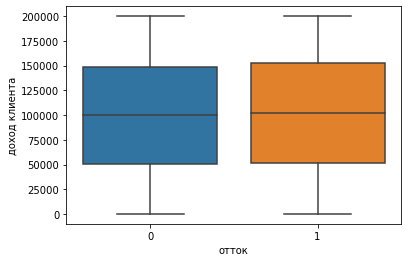

In [54]:
sns.boxplot(x=bank['отток'], y=bank['доход клиента'])
plt.show()

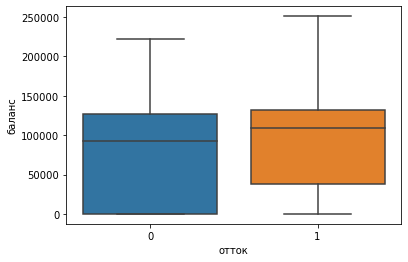

In [55]:
sns.boxplot(x=bank['отток'], y=bank['баланс'])
plt.show()

In [56]:
bank.groupby('отток')['баланс'].mean()

отток
0    72745.296779
1    91108.539337
Name: баланс, dtype: float64

In [57]:
bank.groupby('отток')['баланс'].mean()

отток
0    72745.296779
1    91108.539337
Name: баланс, dtype: float64

Итак, мы сравнили некоторые характеристики, которые важны в работе банка. Мы выявили, что в большей степени о желании клиента покинуть банк нам может сказать следующее:

1. Возраст клинта (чем клиент старше, тем больше вероятность, что он уйдет);
2. Неактивность клинта (активные клиенты покидают банк поти в полтара раза реже);
3. Наличие кредитной карты (да, это неожиданно, но клиенты, которые имеют кредитку уходят чаще);
4. Размер баланса (это не вдияет напрямую, но в основном клиенты уходят со средним уровнем счета).

Следующие факторы оказались не так важны:
1. Срок сотрудничества клиента с банком;
2. Уровень заработной платы.

Можно попробовать создать "идеального клиента" банка, который на вряд ли его покинет.

In [58]:
bank['баланс'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: баланс, dtype: float64

In [59]:
def get_balance_cat(balance):
    if balance < 50000:
        return 'мало сбережений'
    elif balance < 100000:
        return 'достаточно сбережений'
    elif balance < 150000:
        return 'много сбережений'
    elif balance >= 150000:
        return 'богатсво'
    else:
        return salary

In [60]:
bank['balance category'] = bank['баланс'].apply(get_balance_cat)

In [61]:
bank.head()

,кредитоспособность,страна клиента,пол,возраст,срок сотрудничества,баланс,количесвто продуктов из банка,наличие кредитной карты,активность клиента в банке,доход клиента,отток,z-score,balance category
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,-0.262735,мало сбережений
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,-1.429272,богатсво
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,-0.003505,много сбережений
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,-2.685542,много сбережений
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,0.076259,много сбережений


In [62]:
bank[['balance category', 'баланс']].tail()

,balance category,баланс
9993,богатсво,155060.41
9994,мало сбережений,0.00
9995,мало сбережений,0.00
9996,достаточно сбережений,57369.61
9999,много сбережений,130142.79


In [63]:
bank['balance category'] = pd.Categorical(bank['balance category'])

In [64]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   кредитоспособность             10000 non-null  int64   
 1   страна клиента                 10000 non-null  object  
 2   пол                            10000 non-null  object  
 3   возраст                        10000 non-null  int64   
 4   срок сотрудничества            10000 non-null  int64   
 5   баланс                         10000 non-null  float64 
 6   количесвто продуктов из банка  10000 non-null  int64   
 7   наличие кредитной карты        10000 non-null  int64   
 8   активность клиента в банке     10000 non-null  int64   
 9   доход клиента                  10000 non-null  float64 
 10  отток                          10000 non-null  int64   
 11  z-score                        10000 non-null  float64 
 12  balance category               10

Размер баланса имеет влияние на отток клиентов, поэтому именно эту переменную интересно сравнить, закодируем, чтобы было удобней

In [65]:
bank['balance category'].cat.codes #массив закодированными числами

0       2
2       0
5       3
7       3
16      3
       ..
9993    0
9994    2
9995    2
9996    1
9999    3
Length: 10000, dtype: int8

In [66]:
bank['balance category'].cat.categories

Index(['богатсво', 'достаточно сбережений', 'мало сбережений',
       'много сбережений'],
      dtype='object')

In [67]:
bank.head()

,кредитоспособность,страна клиента,пол,возраст,срок сотрудничества,баланс,количесвто продуктов из банка,наличие кредитной карты,активность клиента в банке,доход клиента,отток,z-score,balance category
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,-0.262735,мало сбережений
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,-1.429272,богатсво
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,-0.003505,много сбережений
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,-2.685542,много сбережений
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,0.076259,много сбережений


In [87]:
#создаем свою переменную идеальный клиент
bank['ideal customer'] = np.where((bank['balance category'] == 'достаточно сбережений') |
                                  (bank['balance category'] == 'мало сбережений') | 
                                  (bank['balance category'] == 'много сбережений') &
                                  (bank['активность клиента в банке'] == 1) &       
                                  (bank['количесвто продуктов из банка'] <= 2) &
                                  (bank['отток'] == 0) &
                                  (bank['возраст'] <= 37), 1, 0) #два аргумента, что вернуть если true, что если false

In [88]:
bank['ideal customer'].value_counts()

1    6078
0    3922
Name: ideal customer, dtype: int64

Выше обозначили клиентов, которые скорее всего не покинут банк в ближайшее время. Под наименование "идеальный клиент" не подходят 3922 человека, из них 2037 человек уже покинули банк. У нас нет четкого периода, за который клиенты покидали банк, но за определенный период может уйти 1885 человек (конечно, это приблизительные данные и просто гипотиза). 

**Итак, мы выявили, что основные факторы, влияющие на отток клиентов это:**

*1. Возрат клиента. Чаще всего банк покидают люди 40+ лет, как правило, у таких людей уже должен быть определенный накоп денег в банке и желание стабильности, однако они все равно предпочитают сменить банк. С другой стороны, люди в возрасте уже имеют какое-то состояние и им не нужно, например, брать кредит или ипотеку в банке;*

*2. Клиенты, которые нечасто взаимодейсвтуют с банком покидают его чаще. Как правило, активные клиенты интересются жизнью банка, следят за его обновленими, но не всем это интересно;*

*3. Банк часто покидают люди, которые используют 3-4 продукта, по идее, им должно быть сложнее отказаться от использования нескольких продуктов сразу;*

*4. Размер баланса тоже в какой-то степени влияет на желание покинуть банк, так, богатые люди уходят чаще, возможно, за более выгодными начислениями на сберегательный счет;*

*5. Чаще всего банк покидают клиенты из Германии.*
    
    
**Определенные моменты не влияют или имеют какое-то незначительное влияние:**

*1. Размер зарплаты клиента. Мы видим, что банк покидают люди в независимости от их дохода;*

*2. Кредитоспособность клиента также не имеет особого влияния. Хотя некоторые клиенты (с низким уровнем оценки кредитоспособности) навряд ли смогут пользоваться всеми продуктами банка, такими как кредит или ипотека;*

*3. Срок сотрудничества с банком. Интересно, что люди уходят, как после одного года с банком, так и после 7 лет. Т.е. они продолжают искать более вгодные варианты.*

**На мой взгляд, банку можно попробовать следующие мероприятия по удержанию клиентов:**

1. Придумать особую систему лояльности для людей старше 40 лет, а особенно пожилых людей. Например, предложить более выгодные условия кредита или выпускать дебетовые карты без платного обслуживания;


2. Вовлекать клиентов быть активными в банке. Например, использовать мобильное приложение, пуш уведомления, которые будут напоминать клиентам о банке. Приложение обязательно должно быть кастомизированным и удобным в использовании, чтобы пользователь мог легко превести деньги на другую карту, посмотреть статистику по доходам и расхода и др. Можно придумать какие-то развлекательные элементы и геймификацию, например, игра за бонусы (как бонусы Сберспасибо);


3. Быть более внимательными к тем, кто использует 3-4 продукта банка. Проанализировать, что не понравилось ушедшим клиентам. Возможно, использование нескольких продуктов сразу более выгодно у конкурентов, нужно это проанализировать и по возможности исправить, например, давать скидку на каждый третий продукт;


4. Проанализировать оснонвынх конкурентов в Германии и определить их уникальное торговое предложение;


5. Банк не может повлиять на баланск клиента, однако он может управлять ставками на сберегательном счете, можно отслеживать процент для более обеспеченных клиентов.